In [23]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from windrose import WindroseAxes

In [24]:
# Load data into a pandas DataFrame
data = pd.read_csv('../data/sierraleone-bumbuna.csv')
data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [25]:
# Summary statistics and missing values
data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [26]:
# Missing values count per column
missing_values_counts = data.isnull().sum()
missing_values_counts

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [27]:
# List columns with > 5% missing values
threshold = 0.05 * len(data)
cols_missing_over_5pct = missing_values_counts[missing_values_counts > threshold]
display(cols_missing_over_5pct)

Comments    525600
dtype: int64

In [28]:
# Outlier detection and Basic cleaning
# columns GHI, DNI, DHI, ModA, ModB, WS, WSgust
# Z-score

columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_zscores = data[columns_to_check].apply(zscore)

# Flag outliers with |Z| > 3
outliers = (df_zscores.abs() > 3)
print("Number of outliers per column:\n", outliers.sum())

# Optionally: mark rows with any outlier
data['outlier_flag'] = outliers.any(axis=1)


Number of outliers per column:
 GHI       2477
DNI       7586
DHI       2986
ModA      1604
ModB      2041
WS        3967
WSgust    3665
dtype: int64


In [29]:
# handling missing values
for col in columns_to_check:
    median_val = data[col].median()
    data[col].fillna(median_val)


In [30]:
# Export cleaned data
data.to_csv('../data/sierraleone-bumbuna_cleaned.csv', index=False)

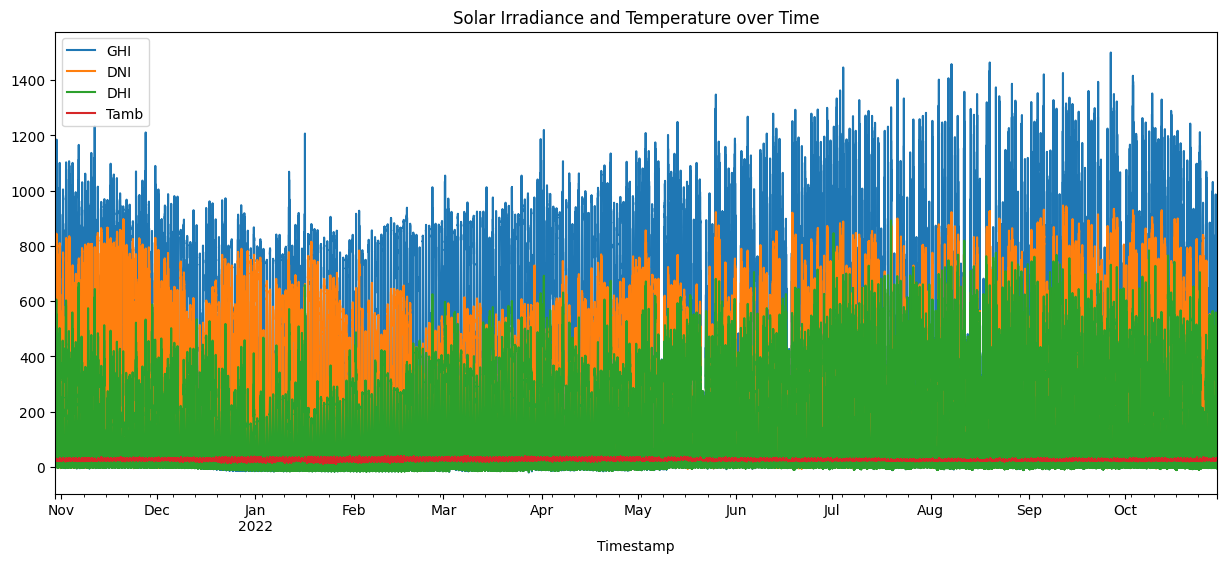

C:\Users\Mesfin\AppData\Local\Temp\ipykernel_7724\2660298898.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = data.resample('M').mean()


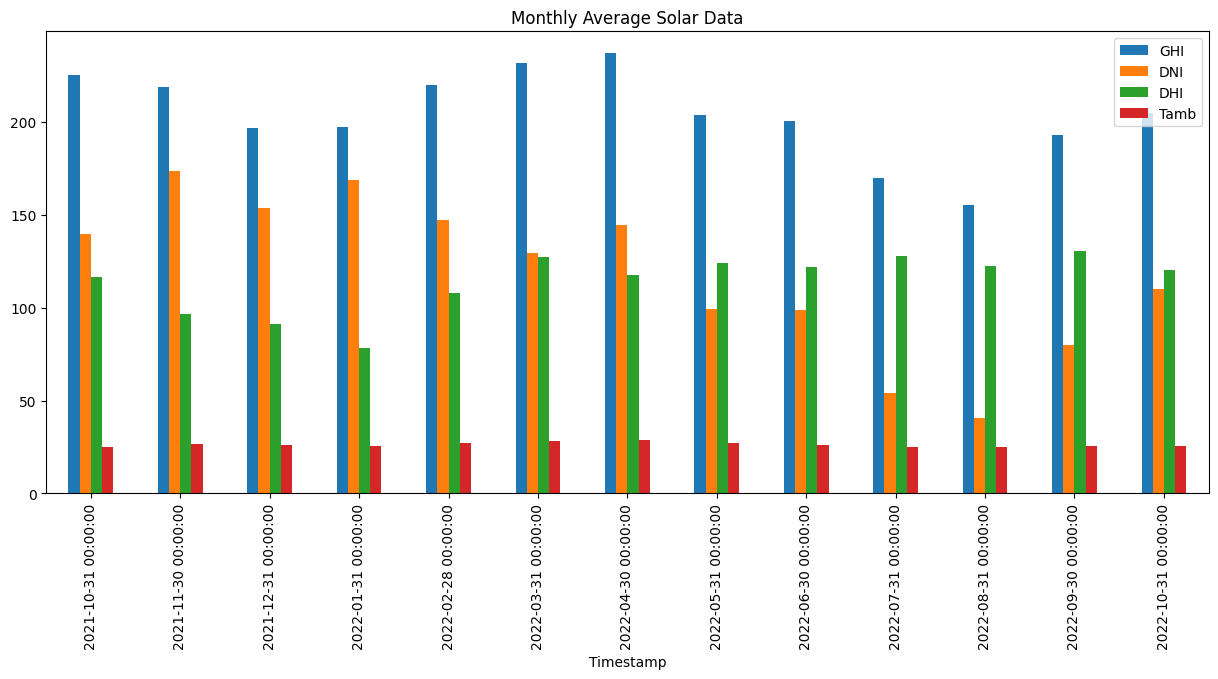

In [31]:
# Time series analysis

data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.set_index('Timestamp', inplace=True)

# Plot GHI, DNI, DHI, Tamb over time
data[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(15,6))
plt.title('Solar Irradiance and Temperature over Time')
plt.show()

# Aggregate monthly
df_monthly = data.resample('M').mean()
df_monthly[['GHI', 'DNI', 'DHI', 'Tamb']].plot(kind='bar', figsize=(15,6))
plt.title('Monthly Average Solar Data')
plt.show()


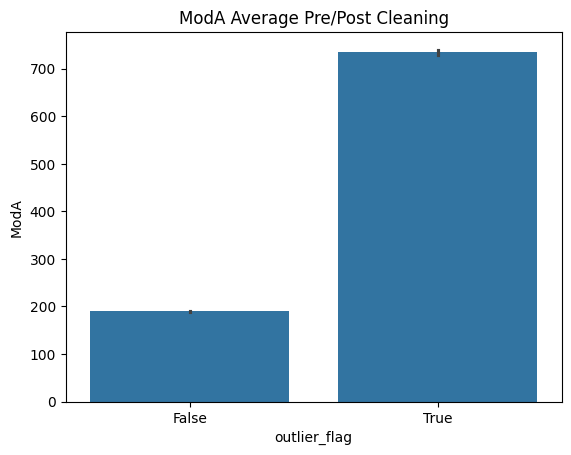

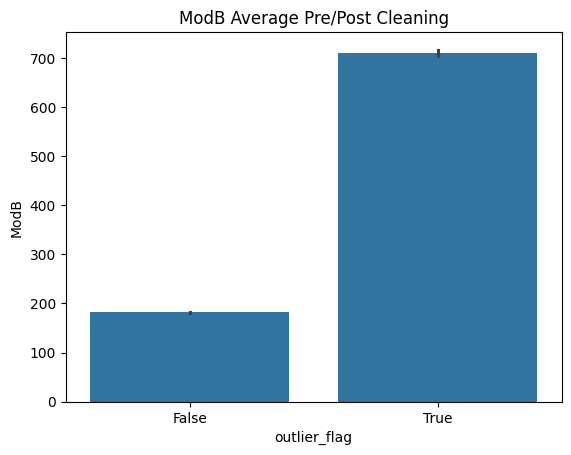

In [32]:
# Cleaning Impact
# Compare ModA & ModB averages pre/post cleaning (based on outlier_flag or missing data flag):
sns.barplot(data, x='outlier_flag', y='ModA')
plt.title('ModA Average Pre/Post Cleaning')
plt.show()

sns.barplot(data, x='outlier_flag', y='ModB')
plt.title('ModB Average Pre/Post Cleaning')
plt.show()


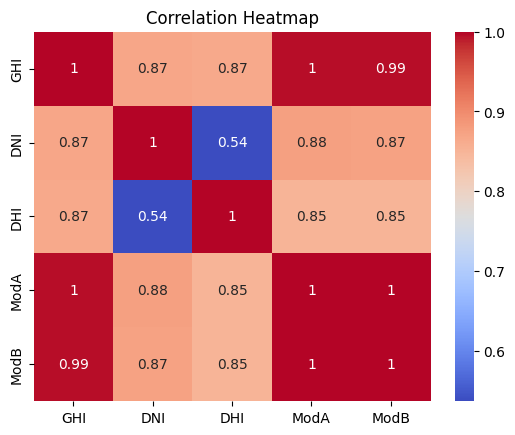

In [33]:
# Correlation & Relationships
# Correlation heatmap
corr_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']
corr = data[corr_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


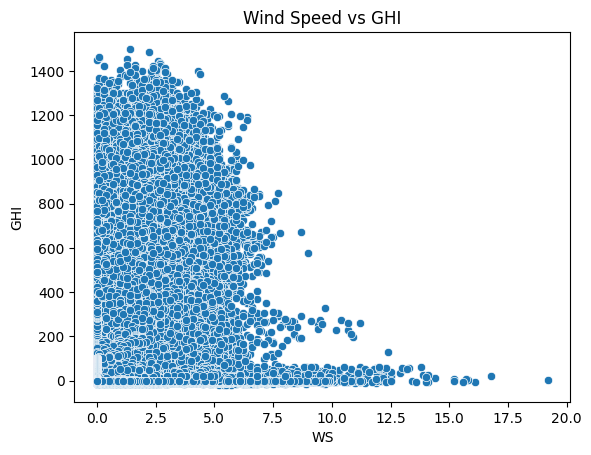

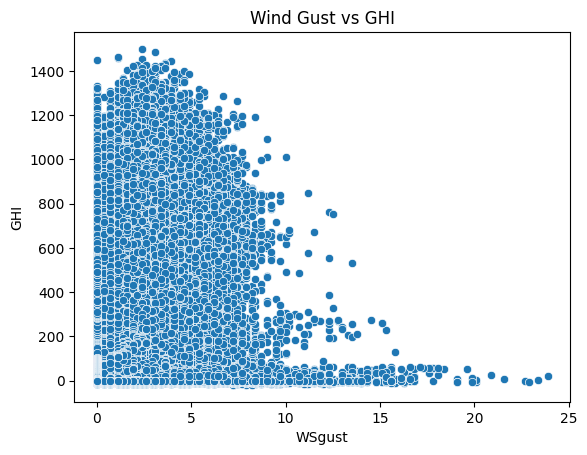

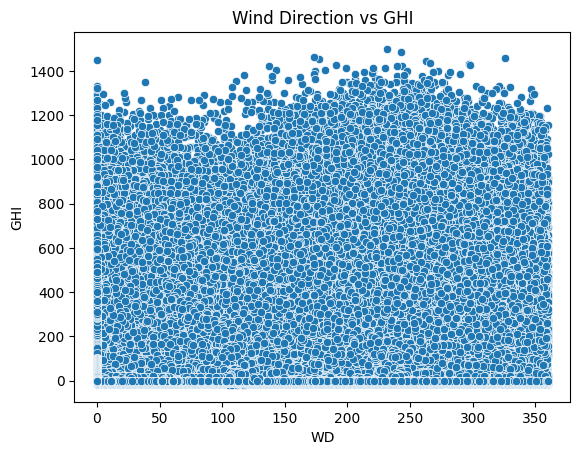

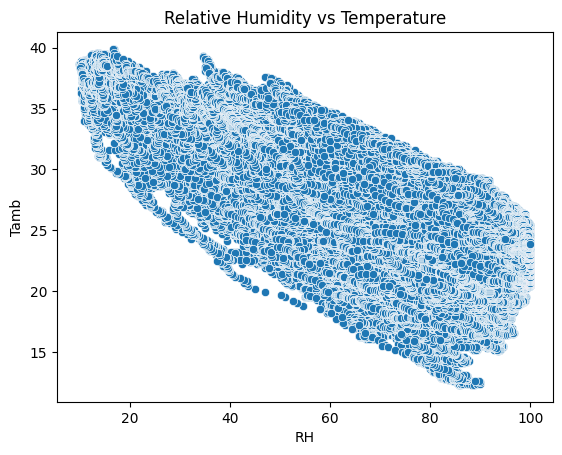

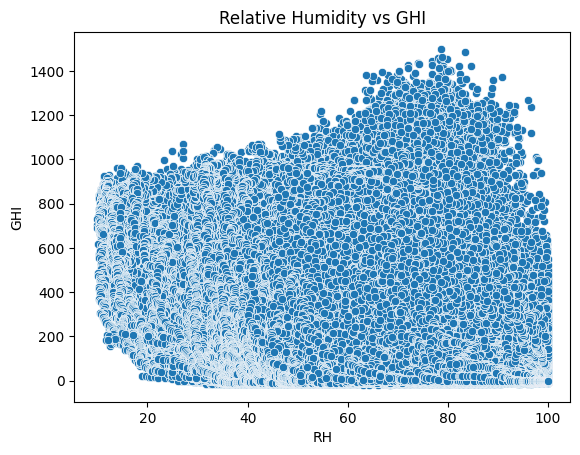

In [34]:
# Scatter plots
sns.scatterplot(data, x='WS', y='GHI')
plt.title('Wind Speed vs GHI')
plt.show()

sns.scatterplot(data, x='WSgust', y='GHI')
plt.title('Wind Gust vs GHI')
plt.show()

sns.scatterplot(data, x='WD', y='GHI')
plt.title('Wind Direction vs GHI')
plt.show()

sns.scatterplot(data, x='RH', y='Tamb')
plt.title('Relative Humidity vs Temperature')
plt.show()

sns.scatterplot(data, x='RH', y='GHI')
plt.title('Relative Humidity vs GHI')
plt.show()


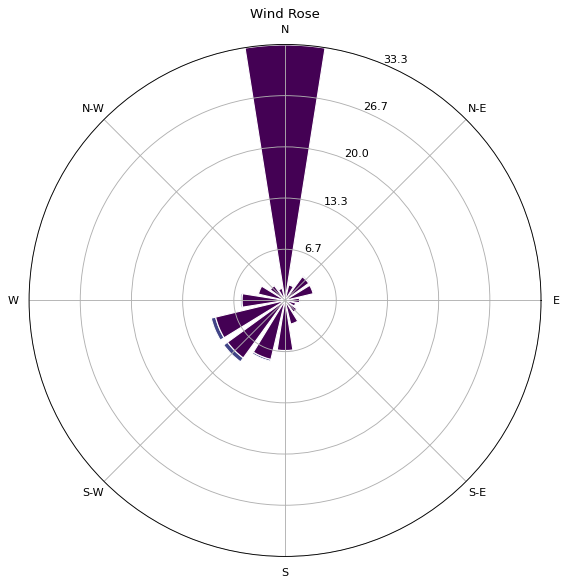

In [35]:
# Wind & Distribution Analysis
ax = WindroseAxes.from_ax()
ax.bar(data['WD'], data['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title('Wind Rose')
plt.show()

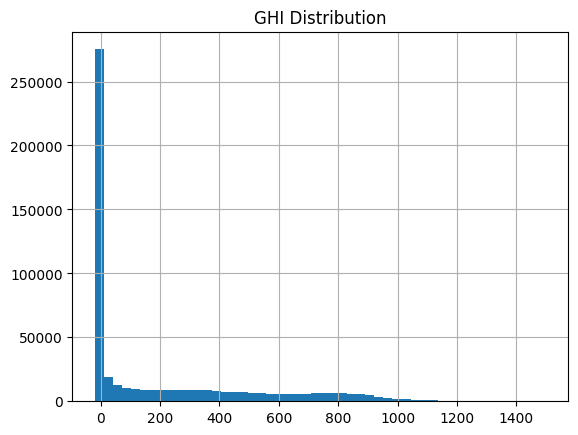

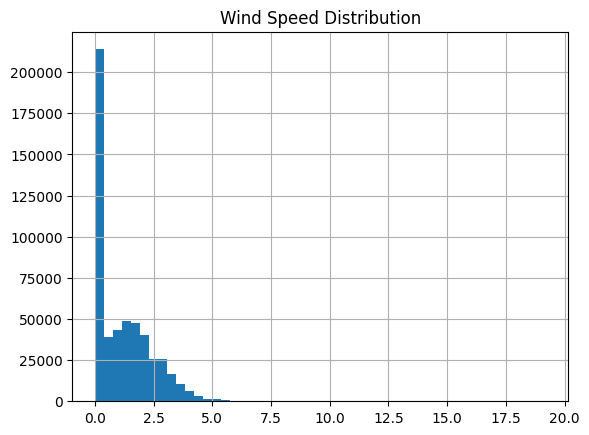

In [36]:
# Histograms:
data['GHI'].hist(bins=50)
plt.title('GHI Distribution')
plt.show()

data['WS'].hist(bins=50)
plt.title('Wind Speed Distribution')
plt.show()


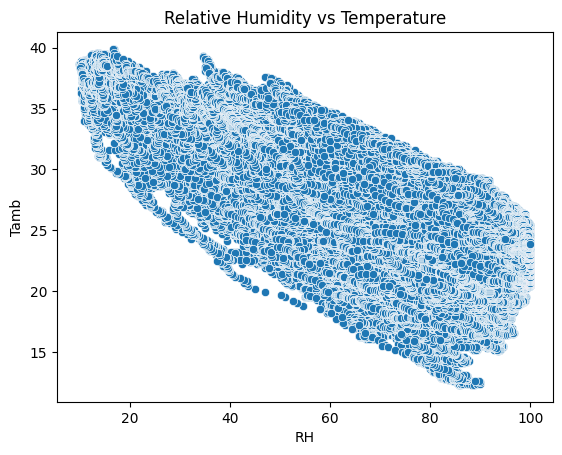

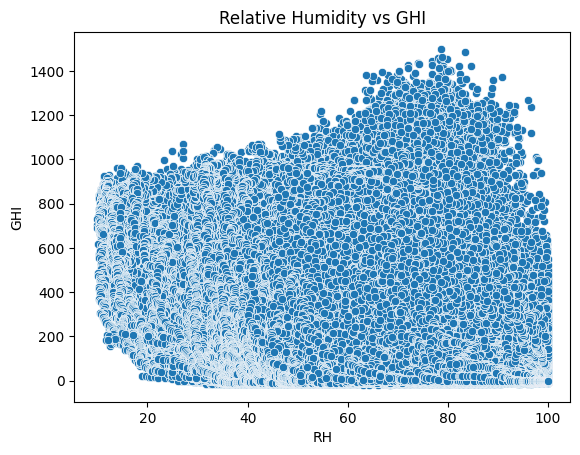

In [37]:
# Temprature Analysis
# Check influence of RH on temperature and solar radiation:
sns.scatterplot(data, x='RH', y='Tamb')
plt.title('Relative Humidity vs Temperature')
plt.show()

sns.scatterplot(data, x='RH', y='GHI')
plt.title('Relative Humidity vs GHI')
plt.show()

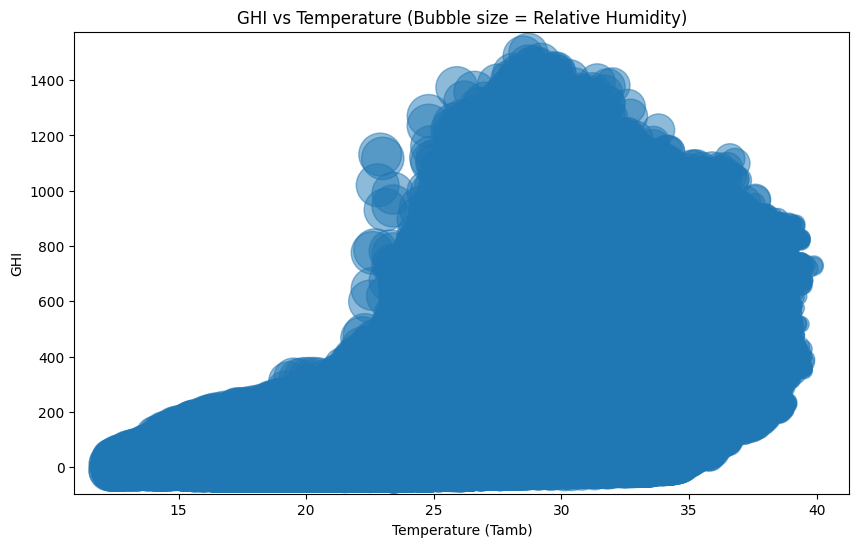

In [38]:
# Bubble chart
plt.figure(figsize=(10,6))
plt.scatter(data['Tamb'], data['GHI'], s=data['RH']*10, alpha=0.5)
plt.xlabel('Temperature (Tamb)')
plt.ylabel('GHI')
plt.title('GHI vs Temperature (Bubble size = Relative Humidity)')
plt.show()